# **Visualizaciones en Python**

## **1. Definir Preguntas e Hipótesis**

Antes de comenzar a realizar los gráficos, es importante establecer preguntas y posibles hipótesis basadas en el dataset:

**Preguntas**

1. ¿Cuál es la distribución de clientes según su **score crediticio**?
2. ¿Existe una relación entre la cantidad de productos contratados (**products_number**) y el abandono (**churn**)?
3. ¿Los clientes activos (**active_member**) tienen menor probabilidad de abandonar el banco?

**Hipótesis**

* **H1**: Los clientes con un score crediticio más bajo tienen mayor tendencia al abandono.
* **H2**: Los clientes que usan más productos del banco tienden a quedarse más tiempo.
* **H3**: Los clientes activos tienen una tasa de churn más baja que los no activos.

## **2. Preparar el Dataset**

Se Asegura la carga del dataset correctamente y el realizar una limpieza básica:

In [ ]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Cargar el dataset desde Google Drive
churn_path = "/content/drive/MyDrive/datasets/Bank_Customer_Churn_Prediction.csv"
df_churn = pd.read_csv(churn_path)

# Ver las primeras filas
display(df_churn)

# Configuraciones para mostrar el DataFrame completo
pd.set_option('display.max_rows', 20)         # Número máximo de filas
pd.set_option('display.max_columns', None)    # Mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False) # Evitar saltos de línea en la tabla

# Verificar si hay valores nulos
print("\nValores nulos en el dataset:")
print(df_churn.isnull().sum())

# Tipos de datos
print("\nTipos de datos:")
print(df_churn.dtypes)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1



Valores nulos en el dataset:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Tipos de datos:
customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


## **3. Visualizaciones con Matplotlib**

### **(a) Distribución del credit_score (Puntuación crediticia)**

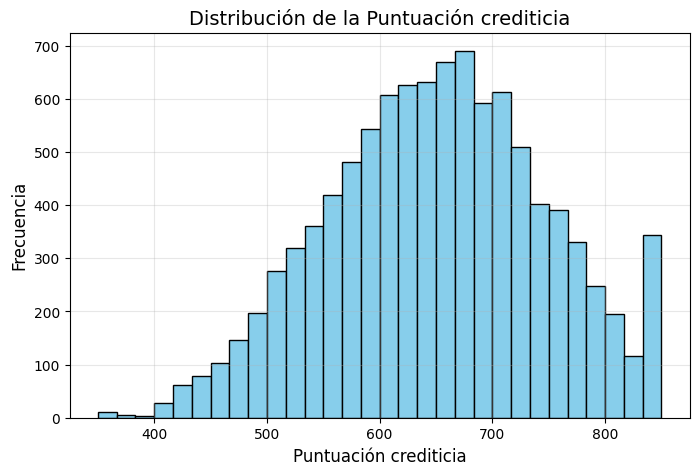

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df_churn['credit_score'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución de la Puntuación crediticia", fontsize=14)
plt.xlabel("Puntuación crediticia", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

El gráfico muestra la **distribución de la puntuación crediticia (credit_score)** en el conjunto de datos.

Distribución general:

* La distribución tiene una **forma asimétrica positiva (derecha)**, con una concentración notable de puntuaciones crediticias entre 600 y 750.
* Esto indica que la mayoría de los clientes tienen puntuaciones crediticias en un rango medio-alto.

Extremos de la distribución:

* **Puntuaciones bajas (< 500)**: Hay muy pocos clientes con puntuaciones extremadamente bajas. Esto podría sugerir que el banco tiene un filtro para evitar clientes con alto riesgo crediticio.
* **Puntuaciones altas (> 800)**: Existe un pequeño grupo de clientes con puntuaciones muy altas, lo que puede ser interpretado como clientes con un historial crediticio excelente.

Pico alrededor de 700:

* **Existe un pico claro** cerca de la puntuación de **700**, lo que sugiere que un gran número de clientes tiene un buen perfil crediticio, aunque sin llegar a ser excelente.

Caída en el rango alto:

* Después de la puntuación de **750**, la frecuencia de clientes disminuye notablemente, lo que refleja que **menos clientes** mantienen puntuaciones superiores, posiblemente por políticas de riesgo del banco o por la dificultad de alcanzar estos valores.

**Conclusión:**

* La mayoría de los clientes tienen una **puntuación crediticia entre 600 y 750**, lo que indica un perfil crediticio **aceptable o bueno**.
* Muy pocos clientes se encuentran en los extremos de la distribución (menores de 500 o mayores de 800).
* **Insight relevante**: El banco podría segmentar a los clientes con puntuaciones **por debajo de 600** como potenciales **grupos de riesgo**, mientras que los clientes con puntuaciones **superiores a 750** podrían ser considerados para ofertas premium o servicios personalizados.
* Esta distribución también puede servir como base para **evaluar correlaciones** con otras variables, como el abandono(churn), para identificar qué perfiles de puntuación tienen mayor probabilidad de abandono.

### **(b) Comparación de products_number (Número de Productos) vs churn (Abandono)**

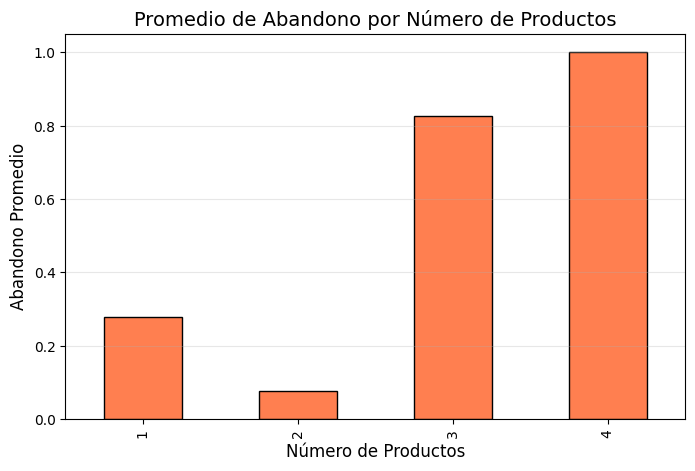

In [ ]:
plt.figure(figsize=(8, 5))
df_churn.groupby('products_number')['churn'].mean().plot(kind='bar', color='coral', edgecolor='black')
plt.title("Promedio de Abandono por Número de Productos", fontsize=14)
plt.xlabel("Número de Productos", fontsize=12)
plt.ylabel("Abandono Promedio", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

**Análisis por categorías de productos:**

Clientes con 1 producto:

* El **promedio de abandono** es **relativamente bajo** (alrededor del 0.28).
* Esto indica que los clientes con un solo producto son menos propensos a abandonar, posiblemente porque su relación con el banco aún está limitada o se encuentran satisfechos con el producto básico.

Clientes con 2 productos:

* El p**romedio de abandono** es **aún menor**, cerca de **0.08**.
* Esto sugiere que los clientes con 2 productos están mucho **más comprometidos** con el banco, lo cual puede deberse a una mayor integración de servicios y satisfacción.

Clientes con 3 productos:

* El abandono promedio **aumenta significativamente**, alcanzando **0.82**.
* Este incremento drástico podría indicar que los clientes con 3 productos experimentan **insatisfacción**, posiblemente por una mayor complejidad en la gestión de los servicios o una percepción de valor insuficiente respecto a los productos adicionales.

Clientes con 4 productos:

* El **abandono promedio alcanza el 1.0** (es decir, **100% de abandono**).
* Esto refleja una **tendencia preocupante**, ya que todos los clientes con 4 productos abandonan el banco.
* Este comportamiento sugiere que los clientes que acumulan más productos podrían estar insatisfechos, o bien que hay un segmento específico con alta predisposición al abandono.

**Conclusión:**

* Existe una **relación no lineal** entre el número de productos y el abandono.
 * Los clientes con **2 productos** son los menos propensos a abandonar, lo que puede indicar un punto óptimo en la relación con el banco.
 * A medida que el número de productos aumenta a **3 o 4**, la tasa de abandono **crece considerablemente**.

* **Insight clave**: El banco debe investigar las causas del abandono en clientes con **3 o más productos**. Posibles estrategias incluyen:
 * Mejorar la **propuesta de valor** de productos adicionales.
 * Evaluar si hay **sobrecarga de productos** que generan insatisfacción o dificultades.
 * Identificar posibles **errores operativos o falta de soporte** que impacten negativamente en estos clientes.

### **(c) Relación entre active_member (Clientes Activos) y churn (Abandono)**

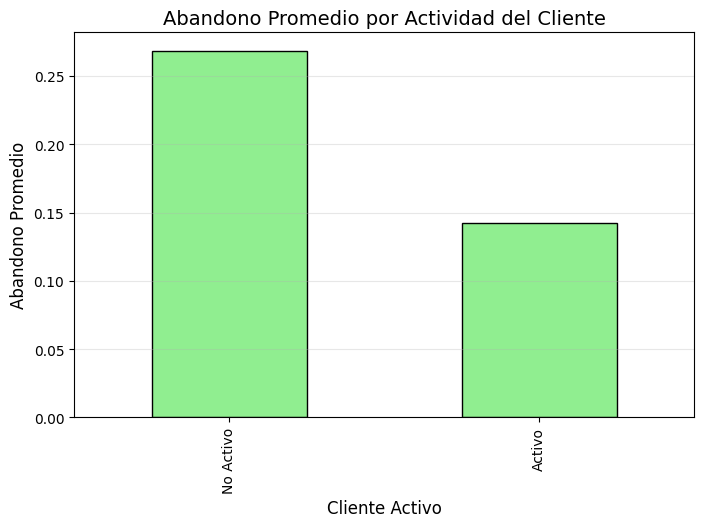

In [ ]:
plt.figure(figsize=(8, 5))
df_churn.groupby('active_member')['churn'].mean().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Abandono Promedio por Actividad del Cliente", fontsize=14)
plt.xlabel("Cliente Activo", fontsize=12)
plt.ylabel("Abandono Promedio", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks([0, 1], labels=['No Activo', 'Activo'])
plt.show()

El gráfico muestra la **relación entre la actividad de los clientes** (active_member) y el **promedio de abandono** (churn) en el banco.

Clientes No Activos:

* El **promedio de abandono** es **0.27** (**27%**).
* Este valor indica que los clientes que **no están activos** tienen una mayor probabilidad de abandonar el banco.
* La inactividad podría estar relacionada con **falta de interacción**, insatisfacción con los servicios o falta de incentivos para mantenerse vinculados al banco.

Clientes Activos:

* El **promedio de abandono** es **0.14** (**14%**).
* Los clientes **activos** muestran una **menor tasa de abandono**, lo cual sugiere que el compromiso y la actividad con el banco juegan un papel crucial para retener a los clientes.
* Este grupo podría estar más satisfecho con los servicios, participando en **más transacciones** o recibiendo beneficios adicionales que los mantienen conectados.

Conclusión:
* Los clientes **no activos** tienen una probabilidad significativamente mayor de abandonar el banco (27%) en comparación con los clientes activos (14%).
* **Insight clave**:
 * El banco debería implementar estrategias para activar a los clientes inactivos y fomentar el uso de sus servicios, tales como:
   * **Programas de fidelización** con recompensas.
   * Campañas de **reenganche**, como ofertas personalizadas o notificaciones sobre beneficios.
   * Análisis de **causas de inactividad**, identificando barreras o problemas que desalientan la participación.
 * Mantener un alto nivel de actividad entre los clientes es fundamental para reducir la tasa de abandono y mejorar la retención.

## **4. Visualizaciones con Seaborn**

### **(a) Distribución de Balance por churn (Abandono)**

<ipython-input-18-b8a8fa00cc3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_churn, x='churn', y='balance', palette='coolwarm')


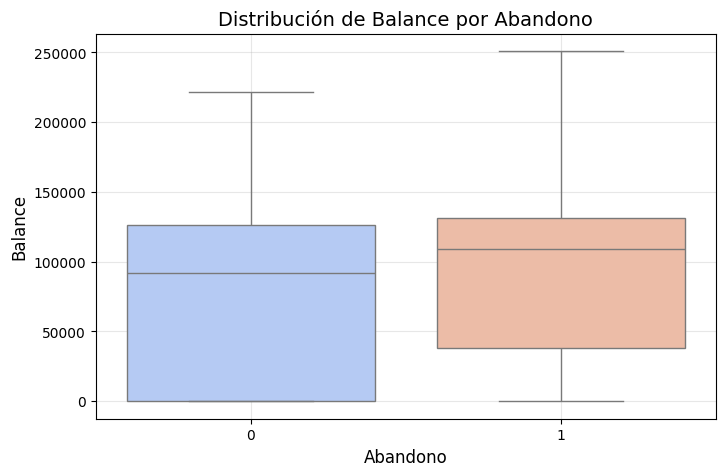

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_churn, x='churn', y='balance', palette='coolwarm')
plt.title("Distribución de Balance por Abandono", fontsize=14)
plt.xlabel("Abandono", fontsize=12)
plt.ylabel("Balance", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

El gráfico de caja compara la **distribución del balance** en función del estado de **abandono** (churn) de los clientes.

Clientes que No Abandonaron (0):

* La mediana del balance se encuentra cerca de **90.000**.
* La distribución tiene un rango más amplio, con valores desde **0 hasta más de 200.000**.
* Existe una presencia significativa de clientes con **balances bajos** (cercanos a 0).

Clientes que Abandonaron (1):

* La mediana del balance es mayor, situándose alrededor de **120.000**.
* Los valores también abarcan un **rango amplio** (de 0 hasta 250,000).
* Se observa una mayor concentración de clientes con balances **más altos** en comparación con los que no abandonaron.

**Conclusiones:**

* **Insight clave**: Los clientes con **balances más altos** tienen una mayor probabilidad de abandonar el banco.
* La mediana del balance para clientes que **abandonan** es superior a la de los clientes que **no abandonan**.
* Posible causa:
 * Los clientes con balances elevados podrían estar buscando **mejores beneficios o tasas de interés** en otras instituciones financieras.
 * Es posible que el banco no esté satisfaciendo sus expectativas de valor o atención.

**Recomendaciones:**

Estrategias de Retención:

* Identificar y monitorear a los clientes con balances elevados que muestran **signos de abandono**.
* Ofrecer **beneficios exclusivos** como tasas preferenciales, asesoramiento financiero o servicios premium.

Segmentación de Clientes:

* Crear campañas dirigidas específicamente a clientes con **balances altos** para mejorar la satisfacción y reducir el churn.

Análisis de Comportamiento:

* Analizar qué otros factores, además del balance, podrían estar contribuyendo al abandono (ej., nivel de servicio, número de productos adquiridos).

Este hallazgo es relevante porque la pérdida de clientes con balances altos tiene un impacto **significativo** en los ingresos y la rentabilidad del banco.

### **(b) Relación entre age (Edad) y credit_score (Puntuación crediticia)**

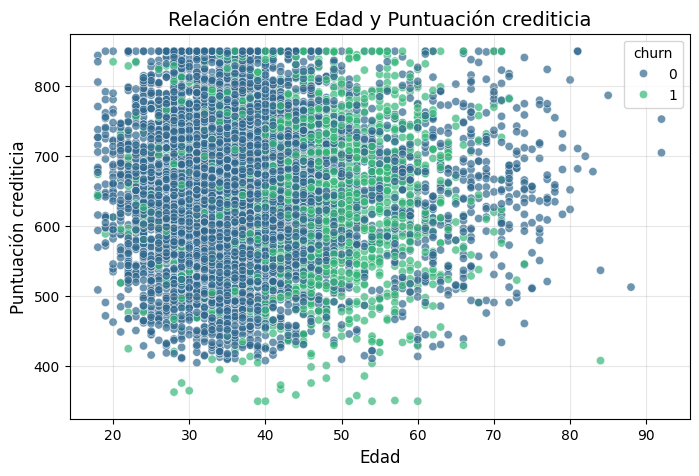

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_churn, x='age', y='credit_score', hue='churn', palette='viridis', alpha=0.7)
plt.title("Relación entre Edad y Puntuación crediticia", fontsize=14)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Puntuación crediticia", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

La ilustración muestra la **relación entre la edad de los clientes (age)** y su **puntuación crediticia (credit_score)**, con el parámetro hue que diferencia a los clientes que hicieron churn (abandono del banco) de los que no.

Concentración de datos:

* La mayoría de los datos se concentran entre los **20 y 50 años de edad** y en un rango de **puntuación crediticia entre 600 y 800 puntos**.
* Esto indica que la mayoría de los clientes están en edades medias y tienen puntuaciones crediticias promedio o altas.

Relación con Abandono bancario:

* Los puntos en **verde claro** representan a los clientes que abandonaron el banco (churn = 1).
* Se observa que el churn (abandono) se distribuye principalmente entre clientes en edades entre **30 y 60 años** y con puntuaciones crediticias **entre 500 y 700**.
* Este patrón sugiere que clientes de mediana edad y puntuación crediticia intermedia son más propensos a abandonar el banco.

Clientes con menor y mayor edad:

* Hay menos puntos (menos clientes) en los extremos de edad (menores de **25 años** y mayores de **70 años**).
* Para estos grupos extremos, se observan menos casos de churn, lo cual puede indicar una menor actividad bancaria o comportamientos más estables.

Puntos aislados (outliers):

* Algunos clientes tienen puntuaciones crediticias muy bajas (menores a 400) o muy altas (cercanas a 900), pero no parecen estar asociados con altos niveles de churn.

**Conclusión:**

* La edad y la puntuación crediticia son variables relevantes para predecir el churn.
* Los clientes de **edad media** y **puntuación crediticia media-baja** representan un grupo de riesgo mayor en términos de abandono.
* Esto sugiere que el banco debería **monitorear** y **retener** a este segmento de clientes mediante estrategias personalizadas, como programas de fidelización o mejoras en la oferta de productos financieros.

### **(c) Heatmap de Correlaciones**

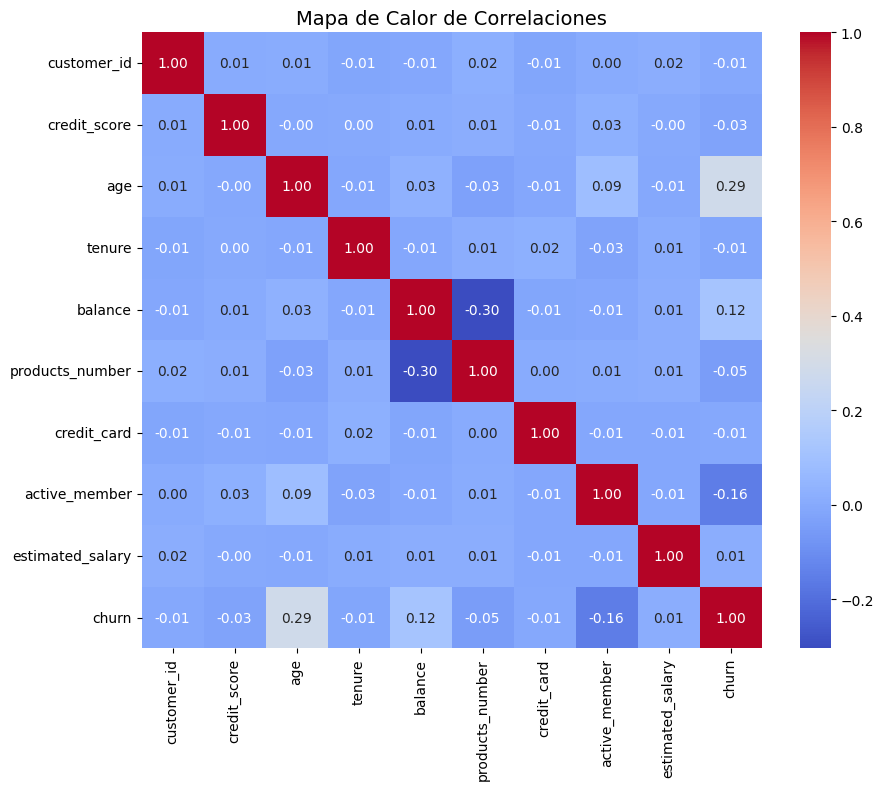

In [ ]:
# Filtrar solo columnas numéricas
numerical_df = df_churn.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation = numerical_df.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de Calor de Correlaciones", fontsize=14)
plt.show()

Este mapa de calor visualiza la correlación entre las variables numéricas del dataset, con valores que oscilan entre -1 y 1.

Correlación entre age y churn (0.29):

* Existe una **correlación positiva moderada** entre la **edad** y el abandono.
* Esto indica que a mayor edad, aumenta la probabilidad de que un cliente abandone.

Correlación entre balance y churn (0.12):

* Existe una **correlación positiva débil** entre el balance del cliente y el abandono.
* Esto confirma el patrón observado en el gráfico anterior: los clientes con balances más altos tienen una mayor probabilidad de abandono.

Correlación entre active_member y churn (-0.16):

* Hay una **correlación negativa débil** entre la actividad del cliente y el abandono.
* Los clientes activos tienden a abandonar menos que los no activos.

Correlación entre products_number y balance (-0.30):

* Esta es una correlación negativa más significativa. A mayor cantidad de productos contratados, el balance tiende a ser menor.

Otras Correlaciones:

* La mayoría de las variables tienen **baja correlación** entre sí, lo que indica que no hay relaciones lineales fuertes en general, excepto las destacadas anteriormente.

**Conclusiones:**

Edad y balance son factores relevantes para predecir el abandono:

* Los clientes mayores y aquellos con balances más altos son más propensos a abandonar.

Actividad del Cliente (active_member):

* Mantener a los clientes activos es clave para reducir la tasa de abandono.

Productos Contratados:

* Aunque no influye directamente en el abandono, la relación con el balance sugiere que clientes con balances más bajos suelen tener más productos contratados.

**Recomendaciones:**

Segmentación por Edad y Balance:

* Implementar estrategias específicas para clientes **mayores** y con **balances elevados**, como beneficios personalizados o programas de fidelización.

Activación de Clientes:

* Incentivar la actividad de los clientes menos activos con campañas o servicios adicionales.

Modelo Predictivo:

* Utilizar estas correlaciones para construir un **modelo de Machine Learning** que identifique a clientes con **alta probabilidad de abandono**.
